In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#Read the Census data
data ="Resources/Census_Population_and_Dwellings_2021.csv"
data_df = pd.read_csv(data, encoding = "utf-8")
data_df

,OBJECTID,CDUID,DGUID,CDNAME,CDTYPE,LANDAREA,PRUID,CSDUID,CSDNAME,CSDTYPE,...,PPU16,PPU21,AreaKM2_21,PopDen16,PopDen21,DwellUR_Den21,DwellUR_Den16,Geography,SHAPE_Length,SHAPE_Area
0,1,3518,2021A00033518,Durham,RM,2521.1075,35,NaN,NaN,NaN,...,2.83,2.87,2521.11,256.2,276.5,96.4,90.4,Durham,421991.476566,5.082071e+09
1,2,3519,2021A00033519,York,RM,1758.2704,35,NaN,NaN,NaN,...,3.11,3.00,1758.27,631.3,667.3,222.4,203.1,York,333126.357925,4.064807e+09
2,3,3520,2021A00033520,Toronto,CDR,631.0983,35,NaN,NaN,NaN,...,2.45,2.41,631.10,4328.3,4427.8,1839.5,1763.5,Toronto,340182.575654,1.216974e+09
3,4,3521,2021A00033521,Peel,RM,1247.4494,35,NaN,NaN,NaN,...,3.21,3.22,1247.45,1107.7,1163.2,361.3,344.8,Peel,256802.308781,2.413943e+09
4,5,3524,2021A00033524,Halton,RM,965.7063,35,NaN,NaN,NaN,...,2.84,2.86,965.71,567.9,617.8,216.0,199.8,Halton,222382.224065,1.844152e+09
5,6,3521,2021A00053521005,Peel,NaN,292.7442,35,3521005.0,Mississauga,CY,...,3.00,2.94,292.74,2465.0,2452.5,835.5,823.0,Mississauga,136815.554456,5.610567e+08
6,7,3521,2021A00053521010,Peel,NaN,265.8874,35,3521010.0,Brampton,CY,...,3.53,3.60,265.89,2232.6,2469.0,686.3,631.9,Brampton,99954.417300,5.137084e+08
7,8,3521,2021A00053521024,Peel,NaN,688.8179,35,3521024.0,Caledon,T,...,3.13,3.23,688.82,96.5,111.2,34.4,30.9,Caledon,151293.075445,1.339178e+09


In [21]:
#Row 3 is the sum number for row 5,6,7
#Deleting Row 5, 6, 7
new_data_df = data_df.loc[0:4, :]
new_data_df

,OBJECTID,CDUID,DGUID,CDNAME,CDTYPE,LANDAREA,PRUID,CSDUID,CSDNAME,CSDTYPE,...,PPU16,PPU21,AreaKM2_21,PopDen16,PopDen21,DwellUR_Den21,DwellUR_Den16,Geography,SHAPE_Length,SHAPE_Area
0,1,3518,2021A00033518,Durham,RM,2521.1075,35,NaN,NaN,NaN,...,2.83,2.87,2521.11,256.2,276.5,96.4,90.4,Durham,421991.476566,5.082071e+09
1,2,3519,2021A00033519,York,RM,1758.2704,35,NaN,NaN,NaN,...,3.11,3.00,1758.27,631.3,667.3,222.4,203.1,York,333126.357925,4.064807e+09
2,3,3520,2021A00033520,Toronto,CDR,631.0983,35,NaN,NaN,NaN,...,2.45,2.41,631.10,4328.3,4427.8,1839.5,1763.5,Toronto,340182.575654,1.216974e+09
3,4,3521,2021A00033521,Peel,RM,1247.4494,35,NaN,NaN,NaN,...,3.21,3.22,1247.45,1107.7,1163.2,361.3,344.8,Peel,256802.308781,2.413943e+09
4,5,3524,2021A00033524,Halton,RM,965.7063,35,NaN,NaN,NaN,...,2.84,2.86,965.71,567.9,617.8,216.0,199.8,Halton,222382.224065,1.844152e+09


In [22]:
#Form new table to compare population change% and private dwelling change% between 2016-2021
dwellings_df =new_data_df [['CDNAME', 'Dwell_UR16', 'Dwell_UR21']]

#Rename the column
rename_dwellings_df = dwellings_df.rename(columns = {'CDNAME':'Municipality',
                                                     'Dwell_UR16':2016,
                                                     'Dwell_UR21':2021})
#Set Area as index
final_dwellings_df = rename_dwellings_df.set_index('Municipality')
final_dwellings_df

,2016,2021
Municipality,,
Durham,227906,243048
York,357084,391034
Toronto,1112929,1160892
Peel,430181,450746
Halton,192977,208601


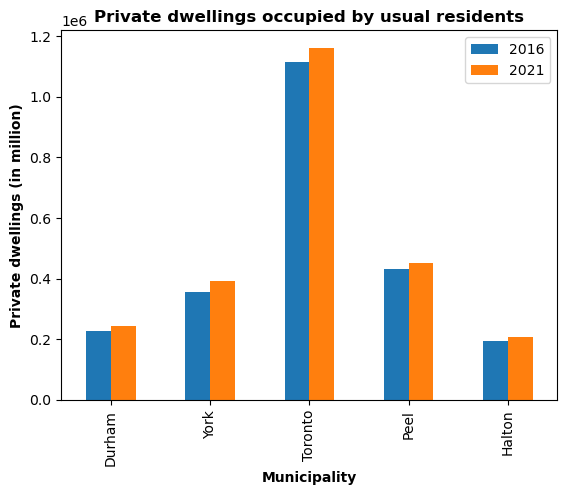

In [23]:
#create graph
bar_dwelling = final_dwellings_df.plot.bar()

bar_dwelling.set_title(label='Private dwellings occupied by usual residents', fontweight = 'bold')
bar_dwelling.set_xlabel('Municipality', fontweight = 'bold')
bar_dwelling.set_ylabel('Private dwellings (in million)', fontweight = 'bold')

bar_dwelling.figure.savefig('Graphs/Private_dwellings_by_residents.png')

plt.show()
plt.close()

In [13]:
#Form new table to compare population change% and private dwelling change% between 2016-2021
percentage_change_df =new_data_df [['CDNAME', 'PopChg16_21', 'DwellChg16_21']]

#Rename the column
rename_percentage_change_df = percentage_change_df.rename(columns = {'CDNAME':'Municipality',
                                                                    'PopChg16_21':'Population_Change',
                                                                    'DwellChg16_21':'Dwelling_Change'})
#Set Area as index
final_percentage_change_df = rename_percentage_change_df.set_index('Municipality')
final_percentage_change_df 

,Population_Change,Dwelling_Change
Municipality,,
Durham,7.9,7.1
York,5.7,9.7
Toronto,2.3,6.3
Peel,5.0,5.4
Halton,8.8,8.2


In [17]:
#Form new table to population density and dwelling 2016-2021
#Using land area in square kilometres, 2021
dwelling_density_df = new_data_df [['CDNAME', 'DwellUR_Den16','DwellUR_Den21', ]]

#Rename the column
rename_dwelling_density_df = dwelling_density_df.rename(columns = {'CDNAME':'Municipality',
                                                                   'DwellUR_Den16':'2016',
                                                                  'DwellUR_Den21':'2021'})
#Set Area as index
final_dwelling_density_df = rename_dwelling_density_df.set_index('Municipality')
final_dwelling_density_df


,2016,2021
Municipality,,
Durham,90.4,96.4
York,203.1,222.4
Toronto,1763.5,1839.5
Peel,344.8,361.3
Halton,199.8,216.0


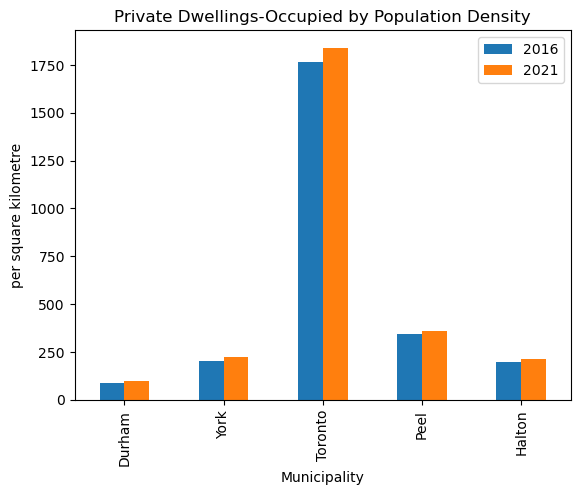

In [18]:
#Graph the dwelling and density in line chart
dwelling_density=final_dwelling_density_df.plot.bar()

#Set Title and Label
plt.title('Private Dwellings-Occupied by Population Density')
plt.xlabel('Municipality')
plt.ylabel('per square kilometre')

plt.legend(loc='upper right')

dwelling_density.figure.savefig('Graphs/dwelling_density.png')

plt.show()